In [22]:
# Importing Dependencies
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as st

In [2]:
# Creating Filepath
filepath = '../Resources/cleanedCaseSurveillance.csv'

# Reading CSV File
df = pd.read_csv(filepath)

# Printing DataFrame
df.head()

,CDC Report Date,Covid Status,Gender,Age Group,Race/Ethnicity,Hospitalized,Pre-Existing Condition
0,2020/11/10,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
1,2020/11/14,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
2,2020/11/19,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No
3,2020/11/13,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,Yes
4,2020/11/09,Laboratory-confirmed case,Male,10 - 19 Years,"Black, Non-Hispanic",No,No


In [13]:
# Printing DateFrame with Columns Needed
df = df[['Covid Status', 'Gender', "Hospitalized"]]

df.head(10)

,Covid Status,Gender,Hospitalized
0,Laboratory-confirmed case,Male,No
1,Laboratory-confirmed case,Male,No
2,Laboratory-confirmed case,Male,No
3,Laboratory-confirmed case,Male,No
4,Laboratory-confirmed case,Male,No
5,Laboratory-confirmed case,Male,No
6,Laboratory-confirmed case,Male,No
7,Laboratory-confirmed case,Male,No
8,Laboratory-confirmed case,Male,No
9,Laboratory-confirmed case,Male,No


In [15]:
# Printing Unique Values
print(df['Gender'].value_counts())
print(df['Hospitalized'].value_counts())

Female    527037
Male      464850
Name: Gender, dtype: int64
No     817981
Yes    173915
Name: Hospitalized, dtype: int64


In [16]:
# Creating DataFrame of Hospitalized Males and Females
hosp_male_df = df.loc[(df['Gender'] == 'Male') & (df['Hospitalized'] == 'Yes')]
hosp_female_df = df.loc[(df['Gender'] == 'Female') & (df['Hospitalized'] == 'Yes')]

hosp_male_size = len(df.loc[(df['Gender'] == 'Male') & (df['Hospitalized'] == 'Yes')])
hosp_female_size = len(df.loc[(df['Gender'] == 'Female') & (df['Hospitalized'] == 'Yes')])

no_hosp_male_size = len(df.loc[(df['Gender'] == 'Male') & (df['Hospitalized'] == 'No')])
no_hosp_female_size = len(df.loc[(df['Gender'] == 'Female') & (df['Hospitalized'] == 'No')])

,Hospitalized,Not Hospitalized
Female,82089,444948
Male,91825,373025


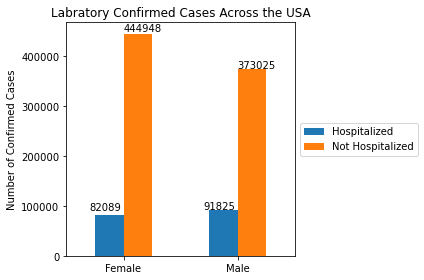

In [67]:
# Creating DataFrame Indexed by Gender of Confirmed Cases and Hospitalized/Non-Hospitalized
index = ['Female','Male']
confirmed_df = pd.DataFrame({'Hospitalized': [hosp_female_size, hosp_male_size], 'Not Hospitalized': [no_hosp_female_size, no_hosp_male_size]}, index=index)

#Plotting Hospitalized and Not Hospitalized Males and Females
confirmed_df.plot.bar(rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel('Number of Confirmed Cases')
plt.title('Labratory Confirmed Cases Across the USA')

#Plotting the Max Count
plt.annotate(hosp_female_size, xy=(0,91900), xytext=(-0.3,92000))
plt.annotate(no_hosp_female_size, (0,449000))
plt.annotate(hosp_male_size, (1,93000), xytext=(0.7,94000))
plt.annotate(no_hosp_male_size, (1,374900))

#Saving DataFrame as PNG
plt.tight_layout()
plt.savefig('../Images/BothGendersHosp_NoHosp.png')

#Printing DataFrame
confirmed_df

,Gender,Number Hospitalized
0,Female,82089
1,Male,91825


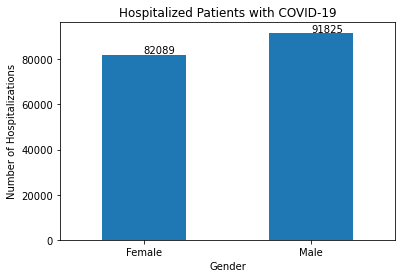

In [64]:
# Creating DataFrame by Gender of Confirmed Cases and Hospitalized
hosp_df = pd.DataFrame({'Gender': ['Female','Male'], 'Number Hospitalized': [hosp_female_size,hosp_male_size]})

#Plotting Hospitalized Males and Females
hosp_df.plot.bar(x='Gender', y='Number Hospitalized', rot=0, legend=False)
plt.ylabel('Number of Hospitalizations')
plt.title('Hospitalized Patients with COVID-19')

#Plotting the Max Count
plt.annotate(hosp_female_size, (0,82900))
plt.annotate(hosp_male_size, (1,92000))

#Saving DataFrame as PNG
plt.savefig('../Images/BothGendersHosp.png')

#Printing DataFrame
hosp_df